In [18]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/bigcontest2019/data/" # train test

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test  train


In [0]:
import os
import sys
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)

import warnings
warnings.filterwarnings("ignore")

# Test1, test2 day 통일

In [24]:
%%time
print(' ')
print('reading datasets')

root_path = "/content/drive/My Drive/bigcontest2019/data/"
train_label = pd.read_csv(root_path + 'train/train_label.csv')

train_activity = pd.read_csv(root_path + 'train' + '/' + 'train_activity.csv')
train_combat = pd.read_csv(root_path + 'train' + '/' + 'train_combat.csv')
train_label = pd.read_csv(root_path + 'train' + '/' + 'train_label.csv')
train_payment = pd.read_csv(root_path + 'train' + '/' + 'train_payment.csv')
train_pledge = pd.read_csv(root_path  + 'train' + '/' + 'train_pledge.csv')
train_trade = pd.read_csv(root_path + 'train' + '/' + 'train_trade.csv')

 
reading datasets
CPU times: user 11.5 s, sys: 399 ms, total: 11.9 s
Wall time: 12.4 s


In [4]:
train_label['amount_spent'].describe() # mean 0.124931

count    40000.000000
mean         0.124931
std          0.722272
min          0.000000
25%          0.000000
50%          0.020343
75%          0.106119
max         39.412632
Name: amount_spent, dtype: float64

In [5]:
perc =[.10, .20, .40, .60, .80, .85, .90,.95, .97, .99, .999]  # 퍼센트 리스트 
train_label['amount_spent'].describe(percentiles = perc)

count    40000.000000
mean         0.124931
std          0.722272
min          0.000000
10%          0.000000
20%          0.000000
40%          0.000000
50%          0.020343
60%          0.038993
80%          0.143745
85%          0.197068
90%          0.271187
95%          0.404857
97%          0.529609
99%          1.215414
99.9%       10.748423
max         39.412632
Name: amount_spent, dtype: float64

In [6]:
train_label['amount_spent'].median()

0.020342850400602637

In [0]:
test1 = test1_activity[['acc_id']]
test1['survival_time'] = 4
test1['amount_spent'] = 0.124931

In [8]:
test1 = test1.drop_duplicates()
len(test1)

20000

In [9]:
test1.head()

,acc_id,survival_time,amount_spent
0,31609,4,0.124931
1,95442,4,0.124931
6,117641,4,0.124931
7,16783,4,0.124931
9,58743,4,0.124931


In [0]:
test2 = test2_activity[['acc_id']]
test2['survival_time'] = 4
test2['amount_spent'] = 0.124931

In [11]:
test2 = test2.drop_duplicates()
len(test2)

20000

In [14]:
test2.head()

,acc_id,survival_time,amount_spent
0,43337,4,0.124931
1,16892,4,0.124931
2,13584,4,0.124931
7,125768,4,0.124931
8,104465,4,0.124931


In [0]:
test1.to_csv('/content/drive/My Drive/bigcontest2019/metrics/nes_inference/' + 'test1_predict.csv', index=False, encoding = 'utf-8')
test2.to_csv('/content/drive/My Drive/bigcontest2019/metrics/nes_inference/' + "test2_predict.csv", index=False, encoding = 'utf-8')

순서대로 test1 score, test2 score, total
1. survival_time : 63, amount_spent : 0.124931 (mean)
    - 78.36	113.832	192.192
    
2. survival_time : 7, amount_spent : 0.124931 (mean)
    - 496.172	517.386	1013.56
    - -> 아직 모르지만, 잔존한다고 하지 않고 7일 이내 이탈한다고 예측하는 게 점수가 높다. 우리 스토리랑 연결지을 수 있을 것 같다.
    
3. survival_time : 7, amount_spent : 0.124931 (99.9%)
   - -208.024	-4027.24	-4235.26 
   
4. survival_time : 7, amount_spent : 0.020342850400602637 (median)
   - 42.6509	55.1516	97.8025
   
5. survival_time : 4, amount_spent : 0.124931 (mean)
   - 447.804	445.765	893.57

가설

1. 

In [0]:
train_label['survive'] = train_label.survival_time.apply(lambda x: 2 
                                                         if x >= 64 
                                                         else (1 if 64> x >= 8 
                                                               else 0))
train_label.head()

,acc_id,survival_time,amount_spent,survive
0,27835,64,0.002559,2
1,12351,64,0.120154,2
2,125437,55,0.182593,1
3,104483,64,0.016241,2
4,4704,20,0.226396,1


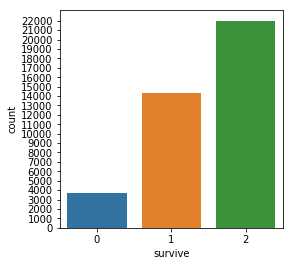

In [0]:
matplotlib.rcParams['figure.figsize'] = (4, 4)
sns.countplot(x='survive', data = train_label)
plt.yticks(np.arange(0, max(train_label['survive'].value_counts())+1000, 1000))
plt.show()

In [0]:
train_label.survive.value_counts()

2    21996
1    14283
0     3721
Name: survive, dtype: int64

# train_activity

In [0]:
actvitiy_merge = train_activity.merge(
    train_label[['acc_id','amount_spent','survive']], 
    on = ['acc_id'], 
    how = 'left')

In [0]:
actvitiy_merge.head()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count,amount_spent,survive
0,1,75001,397380,aa,1.441844,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,1.10514,0.034006,0.0,0.215798,2
1,1,75001,216231,aa,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,-0.013963,0.0,0.215798,2
2,1,75711,308769,aa,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.0,0.00000,-0.001987,0.0,0.006825,2
3,1,72230,387177,aa,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.0,0.00000,-0.028884,0.0,0.001575,1
4,1,34253,339862,aa,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,0.011777,0.0,0.000000,2


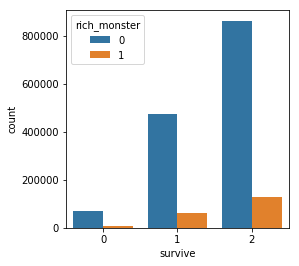

In [0]:
matplotlib.rcParams['figure.figsize'] = (4, 4)
ax = sns.countplot(x="survive", hue="rich_monster", data=actvitiy_merge)
plt.show()

In [0]:
# p['perc']= p['score']/p['score'].sum()
print(actvitiy_merge[['survive']].eq(0).sum())
print(actvitiy_merge[['survive']].eq(1).sum())
print(actvitiy_merge[['survive']].eq(2).sum())

survive    76735
dtype: int64
survive    532289
dtype: int64
survive    992810
dtype: int64


rich_monster와 survi

# train_combat

In [0]:
combat_merge = train_combat.merge(
    train_label[['acc_id','amount_spent','survive']], 
    on = ['acc_id'], 
    how = 'left')

In [0]:
combat_merge.head()

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent,amount_spent,survive
0,1,13809,54861,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.302485,2
1,1,13809,256332,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.302485,2
2,1,13809,307293,ap,3,14,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.302485,2
3,1,13809,374964,ap,7,16,0.0,0.0,0.0,0.0,0.0,0.112612,0.098129,0.302485,2
4,1,13809,117917,ap,2,11,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.302485,2


In [0]:
pledge_merge = train_pledge.merge(
    train_label[['acc_id','amount_spent','survive']], 
    on = ['acc_id'], 
    how = 'left')

In [0]:
pledge_merge.head()

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time,amount_spent,survive
0,1,106660,345122,aa,381,0.036089,0.036089,0.0,0.0,0.0,0.0,0.000000,0.007078,0.027568,0.000000,0.254482,2
1,1,46383,161773,aa,10892,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006139,0.059158,2
2,1,18495,321373,aa,13705,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000347,0.006628,2
3,1,118293,366707,aa,2982,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001042,0.007350,1
4,1,50421,158063,aa,27104,0.216536,0.072179,0.0,0.0,0.0,0.0,0.098883,0.056626,0.083978,0.000000,0.060438,2


In [0]:
train_label['total_spent'] = train_label['amount_spent']

payment_merge = train_payment.merge(
    train_label[['acc_id','total_spent','survive']], 
    on = ['acc_id'], 
    how = 'left')

In [0]:
payment_merge.head()

,day,acc_id,amount_spent,total_spent,survive
0,18,27835,0.826123,0.002559,2
1,23,27835,0.011735,0.002559,2
2,27,27835,0.035204,0.002559,2
3,17,12351,0.528062,0.120154,2
4,11,125437,0.633674,0.182593,1


In [0]:
train_label['source_acc_id'] = train_label['acc_id']
train_label['target_acc_id'] = train_label['acc_id']
train_label['source_survive'] = train_label['survive']
train_label['target_survive'] = train_label['survive']
train_label['source_spent'] = train_label['amount_spent']
train_label['target_spent'] = train_label['amount_spent']

In [0]:
trade_merge = train_trade.merge(
    train_label[['source_acc_id','source_survive','source_spent']],
    on = ['source_acc_id'], 
    how = 'left').merge(
    train_label[['target_acc_id','target_survive','target_spent']], 
    on = ['target_acc_id'], 
    how = 'left')

In [0]:
trade_merge.head()

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price,source_survive,source_spent,target_survive,target_spent
0,7,21:13:05,1,ag,11439,385109,48152,34247,enchant_scroll,4.793968e-08,NaN,2.0,0.127340,1.0,0.124780
1,2,15:33:00,1,al,22220,259705,43228,379826,enchant_scroll,4.314571e-06,NaN,NaN,NaN,2.0,0.001017
2,1,14:24:53,1,al,18212,164230,38145,34209,accessory,7.190952e-08,NaN,2.0,0.753473,2.0,0.497481
3,7,23:13:43,1,au,121622,49839,71226,281334,adena,9.587936e-03,NaN,NaN,NaN,1.0,0.000000
4,2,12:43:33,0,bd,14421,344503,65220,210558,etc,1.198492e-07,0.000639,2.0,0.036092,NaN,NaN


In [0]:
trade_merge.shape

(1849325, 15)

In [0]:
train_trade.shape

(1849325, 11)